# Project: Wrangling and Analyze Data

In [1]:
import wptools
import os
import requests
import pandas as pd
import tweepy
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Data Gathering
In the cell below, l gathered **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.

##### 1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv', sep = ',')

##### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [4]:
# Save HTML to file
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [5]:
images = pd.read_csv('image_predictions.tsv',sep='\t')
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


##### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

#Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
#These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

#NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
#df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
#change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
#NOTE TO REVIEWER: this student had mobile verification issues so the following
#Twitter API code was sent to this student from a Udacity instructor
#Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

#Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
#Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    #This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e: #except tweepy.TweepError as e: 
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
import json

df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        
        tweet_id = data['id']
        created_at = data['created_at']
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']
        df_list.append({'tweet_id': tweet_id,
                       'created_at': created_at,
                       'favorite_count': favorite_count,
                       'retweet_count': retweet_count})
        
tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'created_at', 'favorite_count', 'retweet_count'])
tweets

,tweet_id,created_at,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,39467,8853
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,33819,6514
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,25461,4328
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,42908,8964
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,41048,9774
...,...,...,...,...
2349,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,111,41
2350,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,311,147
2351,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,128,47
2352,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,132,48


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [10]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   created_at      2354 non-null   object
 2   favorite_count  2354 non-null   int64 
 3   retweet_count   2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [11]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
df.retweeted_status_id.nunique()

181

In [13]:
df.tweet_id.nunique()

2356

In [14]:
df.timestamp.nunique()

2356

In [15]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [16]:
df.text

0                                                            This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2                        This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3                                                                  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
                                                                                       ...                                                       

In [17]:
df.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [18]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [19]:
df.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [20]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [21]:
df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [22]:
df.name.value_counts().head(30)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Stanley      6
Rusty        6
Bella        6
Dave         6
Jack         6
Koda         6
Scout        6
Jax          6
Milo         6
Louis        5
Name: name, dtype: int64

In [23]:
df.name.duplicated().value_counts()

True     1399
False     957
Name: name, dtype: int64

In [24]:
df['expanded_urls'].isna().sum()

59

In [25]:
df['expanded_urls'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: expanded_urls, Length: 2356, dtype: bool

In [26]:
df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [27]:
df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [28]:
df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [29]:
df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [30]:
tweets

,tweet_id,created_at,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,39467,8853
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,33819,6514
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,25461,4328
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,42908,8964
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,41048,9774
...,...,...,...,...
2349,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,111,41
2350,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,311,147
2351,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,128,47
2352,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,132,48


In [31]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [32]:
images.jpg_url.value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

In [33]:
images.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

In [34]:
images.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [35]:
list(images.p2.sample(30))

['Pembroke',
 'toy_poodle',
 'Siamese_cat',
 'Labrador_retriever',
 'kuvasz',
 'swab',
 'standard_poodle',
 'Eskimo_dog',
 'goldfish',
 'malamute',
 'German_short-haired_pointer',
 'Siberian_husky',
 'miniature_pinscher',
 'Irish_terrier',
 'golden_retriever',
 'golden_retriever',
 'Labrador_retriever',
 'Shih-Tzu',
 'Brabancon_griffon',
 'Italian_greyhound',
 'toy_terrier',
 'Cardigan',
 'Great_Pyrenees',
 'Cardigan',
 'cash_machine',
 'palace',
 'golden_retriever',
 'Irish_terrier',
 'Pekinese',
 'Siberian_husky']

In [36]:
tweets.created_at

0       Tue Aug 01 16:23:56 +0000 2017
1       Tue Aug 01 00:17:27 +0000 2017
2       Mon Jul 31 00:18:03 +0000 2017
3       Sun Jul 30 15:58:51 +0000 2017
4       Sat Jul 29 16:00:24 +0000 2017
                     ...              
2349    Mon Nov 16 00:24:50 +0000 2015
2350    Mon Nov 16 00:04:52 +0000 2015
2351    Sun Nov 15 23:21:54 +0000 2015
2352    Sun Nov 15 23:05:30 +0000 2015
2353    Sun Nov 15 22:32:08 +0000 2015
Name: created_at, Length: 2354, dtype: object

In [37]:
nu_df = df[df['tweet_id'] == 666020888022790149]
nu_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [38]:
n_df = images[images['tweet_id'] == 666020888022790149] 
n_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [39]:
u_df = tweets[tweets['tweet_id'] == 666020888022790149] 
u_df

,tweet_id,created_at,favorite_count,retweet_count
2353,666020888022790149,Sun Nov 15 22:32:08 +0000 2015,2535,532


In [40]:
sum(images.duplicated())

0

### Quality issues
1.	Retweets data
2.	Retweet and in-reply columns
3.	Incorrect dog names - values that are all lowercase are invalid entries (i.e. not dog names)
4.	Source column is in HTML-formatted string, not a normal string
5.	Timestamp and tweet_id datatypes for df table
6.	Created_at and tweet_id column datatype and its naming ambiguity in tweets_clean table
7.	Multiple confidence levels and dog breed columns of image predictions
8.	Consistency Issue - dog breed names are in lower case and others in upper case in images_clean table
9.	Hyperlinks in df_clean table
10.	Column name not concise and descriptive enough

### Tidiness issues
1. Merging the three data sets into one
2. Combining the columns doggo, puppo, pupper, floofer into a single column.

1.	Dog stages column 
2.	Favorite_count and retweet_count should be part of df table
3.	Text column output is truncated
4.	Image predictions table should be added to twitter archive table

## Cleaning Data
In this section, l cleaned **all** of the issues documented while assessing. 

**Note:** copies of the original data before cleaning was made. 

# Make copies of original pieces of data


In [41]:
df_clean = df.copy()
images_clean = images.copy()
tweets_clean = tweets.copy()

# QUALITY ISSUES

### ISSUE 1: Retweets data

#### DEFINE
Delete rows with retweets data

#### CODE

In [42]:
df_clean = df_clean[np.isnan(df_clean.retweeted_status_id)]

#### TEST

In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### ISSUE 2: Retweet and in-reply columns

#### DEFINE:
Drop the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp	

#### CODE

In [44]:
df_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id',
                          'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

#### TEST

In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### ISSUE 3: Incorrect dog names - name' values that are all lowercase are invalid entries (i.e. not dog names)

#### DEFINE: Remove incorrect dog names

In [46]:
df_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

#### CODE

In [47]:
# a list to contain all the names that starts with lowercase
notNames = []

for c in df_clean.name:
    if c.islower() and c not in notNames:
        notNames.append(c)
    
print(notNames)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [48]:
df_clean['name'][df_clean['name'].str.match('[a-z]+')] = 'None'

C:\Users\pgsib\AppData\Local\Temp\ipykernel_15448\2332046456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['name'][df_clean['name'].str.match('[a-z]+')] = 'None'


#### TEST

In [49]:
# confirm changes
df_clean.name.value_counts()

None          784
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

In [50]:
# a list to contain all the names that starts with lowercase
notNames = []

for c in df_clean.name:
    if c.islower() and c not in notNames:
        notNames.append(c)
    
print(notNames)

[]


In [51]:
df_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

### ISSUE 4: Source column is in HTML-formatted string, not a normal string

#### DEFINE:  Extract the normal understandable string for sources column

#### CODE

In [52]:
df_clean.source = df_clean.source.str.extract('>([\w\W\s]*)<', expand=True)

#### TEST

In [53]:
#confirm changes
df_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [54]:
df_clean['source'] = df_clean['source'].str.replace("-", "", regex=True)
# df1["price_usd"] = df1["price_usd"].str.replace("$", "", regex=True)

In [55]:
df_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine  Make a Scene',
       'TweetDeck'], dtype=object)

### ISSUE 5: Timestamp and tweet_id datatypes for df dataframe

#### DEFINE:
Convert:
1. Timestamp datatype to datetime type
2. Tweet_id from int to string

#### CODE

In [56]:
# Remove the time zone from the 'timestamp' column
df_clean['timestamp'] = df_clean['timestamp'].str.slice(start=0, stop=-6)

In [57]:
# Change the 'timestamp' column to a datetime object
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

In [58]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)

#### TEST

In [59]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2175 non-null   int64         
 6   rating_denominator  2175 non-null   int64         
 7   name                2175 non-null   object        
 8   doggo               2175 non-null   object        
 9   floofer             2175 non-null   object        
 10  pupper              2175 non-null   object        
 11  puppo               2175 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


In [60]:
df_clean.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2351   2015-11-16 00:24:50
2352   2015-11-16 00:04:52
2353   2015-11-15 23:21:54
2354   2015-11-15 23:05:30
2355   2015-11-15 22:32:08
Name: timestamp, Length: 2175, dtype: datetime64[ns]

### ISSUE 6: Created_at and tweet_id column - incorrect datatypes

#### DEFINE:

1. Convert created_at datatype to datetime datatype
2. convert tweet_id from int to string

#### CODE

In [61]:
# Change the 'timestamp' column to a datetime object
tweets_clean['created_at'] = pd.to_datetime(tweets_clean['created_at'])

In [62]:
tweets_clean['tweet_id'] = tweets_clean['tweet_id'].astype(str)

#### TEST

In [63]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2354 non-null   object             
 1   created_at      2354 non-null   datetime64[ns, UTC]
 2   favorite_count  2354 non-null   int64              
 3   retweet_count   2354 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(1)
memory usage: 73.7+ KB


In [64]:
tweets_clean.created_at.sample(10)

1646   2016-01-03 22:14:26+00:00
920    2016-07-21 23:53:04+00:00
1812   2015-12-15 04:19:18+00:00
2026   2015-12-02 01:39:53+00:00
451    2017-01-10 00:24:38+00:00
1732   2015-12-23 18:51:56+00:00
289    2017-03-04 22:12:52+00:00
290    2017-03-04 17:56:49+00:00
1983   2015-12-04 22:00:08+00:00
429    2017-01-16 17:20:45+00:00
Name: created_at, dtype: datetime64[ns, UTC]

### ISSUE 7: Multiple confidence levels and dog breed columns of image predictions 

#### DEFINE:
1. Create a column that will display only the best confidence levels of image predictions
2. Drop the following columns: 'p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'

#### CODE

In [65]:
predicted_breed = []
confidence_level = []

def predict(dataframe):
    if dataframe['p1_dog'] == True:
        predicted_breed.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        predicted_breed.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        predicted_breed.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        predicted_breed.append('NaN')
        confidence_level.append(0)

images_clean.apply(predict, axis=1)
images_clean['predicted_breed'] = predicted_breed
images_clean['confidence_level'] = confidence_level

#### TEST

In [66]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,predicted_breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [67]:
images_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],axis=1,inplace=True)

In [68]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2075 non-null   int64  
 1   jpg_url           2075 non-null   object 
 2   img_num           2075 non-null   int64  
 3   predicted_breed   2075 non-null   object 
 4   confidence_level  2075 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.2+ KB


### ISSUE 8: Consistency Issue - dog breed names are in lower case and others in upper case in images_clean table

#### DEFINE:
Capitalize the first letter of the predicted dog-breed names

#### CODE

In [69]:
images_clean['predicted_breed'] = images_clean['predicted_breed'].apply(lambda x: x.capitalize())

#### TEST

In [70]:
images_clean.head()

,tweet_id,jpg_url,img_num,predicted_breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311


In [71]:
images_clean.predicted_breed

0       Welsh_springer_spaniel
1                      Redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           Miniature_pinscher
                 ...          
2070                    Basset
2071        Labrador_retriever
2072                 Chihuahua
2073                 Chihuahua
2074                       Nan
Name: predicted_breed, Length: 2075, dtype: object

In [72]:
images_clean.tail()

,tweet_id,jpg_url,img_num,predicted_breed,confidence_level
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Nan,0.000000


In [73]:
images.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


### ISSUE 9: Hyperlinks in df_clean dataset

#### DEFINE
Remove hyperlinks in tweets.

#### CODE

In [74]:
#A function to apply to df_clean table
def htmlink(x):
        http_pos = x.find("http")
        # If no link, retain row
        if http_pos == -1:
            x = x
        else:
            # Remove space before link to end
            x = x[:http_pos - 1]
        return x
    
df_clean.text = df_clean.text.apply(htmlink)

#### TEST

In [75]:
#confirm if hyperlinks have been removed in column again
for row in df_clean.text[:10]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10
This is Zoey. She doesn't want to be one of the scary shark

In [76]:
df_clean.text

0                                                            This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
2                        This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
3                                                                  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek
                                                                           ...                                                                    
2351                                              Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox 

### ISSUE 10: img_num - Column name not concise

#### DEFINE
Rename img_num to image_number

#### CODE

In [77]:
images_clean.rename(columns = {'img_num':'image_number'}, inplace = True)

#### TEST

In [78]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2075 non-null   int64  
 1   jpg_url           2075 non-null   object 
 2   image_number      2075 non-null   int64  
 3   predicted_breed   2075 non-null   object 
 4   confidence_level  2075 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.2+ KB


### ISSUE 11: Incorrect datatype for tweet_id in the images_clean table

#### DEFINE
Convert datatype from int to string

#### CODE

In [79]:
images_clean['tweet_id'] = images_clean['tweet_id'].astype(str)

#### TEST

In [80]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2075 non-null   object 
 1   jpg_url           2075 non-null   object 
 2   image_number      2075 non-null   int64  
 3   predicted_breed   2075 non-null   object 
 4   confidence_level  2075 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.2+ KB


# TIDINESS ISSUES

### ISSUE 1: Dog stages column

#### DEFINE
1. Extract dog stages from the following columns:doggo, floofer,  puppo and pupper
2. Drop: all_stages, doggo, floofer,  puppo and pupper  

#### CODE

In [81]:
df_clean['all_stages'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

In [82]:
df_clean.all_stages.value_counts()

NoneNoneNoneNone        1831
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: all_stages, dtype: int64

In [83]:
def stages(df):
    if df['all_stages'].count('None') == 2:
        return 'Multiple' #for more than one dog stage
    else:
        if df['all_stages'].count('doggo') == 1:
            return 'Doggo'
        elif df['all_stages'].count('floofer') == 1:
            return 'Floofer'
        elif df['all_stages'].count('pupper') == 1:
            return 'Pupper'
        elif df['all_stages'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'

df_clean['dog_stage'] = df_clean.apply(stages, axis=1)

In [84]:
df_clean.drop(['floofer', 'puppo', 'pupper', 'doggo', 'all_stages'],axis=1,inplace=True)

In [85]:
#  Use np.nan to fill the empty spaces
df_clean['dog_stage'] = df_clean['dog_stage'].replace('None', np.nan)

#### TEST

In [86]:
# matched deleted columns
df_clean.dog_stage.value_counts()

Pupper      224
Doggo        75
Puppo        24
Multiple     12
Floofer       9
Name: dog_stage, dtype: int64

In [87]:
df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,NaN
2352,666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,None,NaN
2353,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,None,NaN
2354,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,None,NaN


### ISSUE 2: Merging the three data sets into one

### DEFINE:
1. Merging the three data sets into one master table
2. Drop created_at since the column shows missing NaT values

#### CODE

In [88]:
all_columns = pd.Series(list(df_clean) + list(images_clean) + list(tweets_clean))
all_columns[all_columns.duplicated()]

9     tweet_id
14    tweet_id
dtype: object

In [89]:
# Tweet_id  is duplicated so it becomes our joining column
merge_df = pd.merge(df_clean,tweets_clean,on=['tweet_id'],how='inner')

In [90]:
master_clean = pd.merge(images_clean,merge_df,on=['tweet_id'],how='inner')

In [91]:
master_clean.drop(columns = ['created_at'], inplace = True)

#### TEST

In [92]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   object        
 1   jpg_url             1994 non-null   object        
 2   image_number        1994 non-null   int64         
 3   predicted_breed     1994 non-null   object        
 4   confidence_level    1994 non-null   float64       
 5   timestamp           1994 non-null   datetime64[ns]
 6   source              1994 non-null   object        
 7   text                1994 non-null   object        
 8   expanded_urls       1994 non-null   object        
 9   rating_numerator    1994 non-null   int64         
 10  rating_denominator  1994 non-null   int64         
 11  name                1994 non-null   object        
 12  dog_stage           306 non-null    object        
 13  favorite_count      1994 non-null   int64       

In [93]:
master_clean.head()

,tweet_id,jpg_url,image_number,predicted_breed,confidence_level,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,NaN,2535,532
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,None,NaN,132,48
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,None,NaN,128,47
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,None,NaN,311,147
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,NaN,111,41


#### Cleaned master dataset

In [94]:
# Rearranging columns for ease of readibilty and understanding
master_clean_archive = master_clean[['tweet_id','timestamp', 'predicted_breed', 'name', 'dog_stage','confidence_level','image_number' , 'source', 'rating_numerator', 'rating_denominator', 'favorite_count','retweet_count','text', 'jpg_url', 'expanded_urls']]
master_clean_archive

,tweet_id,timestamp,predicted_breed,name,dog_stage,confidence_level,image_number,source,rating_numerator,rating_denominator,favorite_count,retweet_count,text,jpg_url,expanded_urls
0,666020888022790149,2015-11-15 22:32:08,Welsh_springer_spaniel,None,NaN,0.465074,1,Twitter for iPhone,8,10,2535,532,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,https://twitter.com/dog_rates/status/666020888022790149/photo/1
1,666029285002620928,2015-11-15 23:05:30,Redbone,None,NaN,0.506826,1,Twitter for iPhone,7,10,132,48,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,https://twitter.com/dog_rates/status/666029285002620928/photo/1
2,666033412701032449,2015-11-15 23:21:54,German_shepherd,None,NaN,0.596461,1,Twitter for iPhone,9,10,128,47,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,https://twitter.com/dog_rates/status/666033412701032449/photo/1
3,666044226329800704,2015-11-16 00:04:52,Rhodesian_ridgeback,None,NaN,0.408143,1,Twitter for iPhone,6,10,311,147,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,https://twitter.com/dog_rates/status/666044226329800704/photo/1
4,666049248165822465,2015-11-16 00:24:50,Miniature_pinscher,None,NaN,0.560311,1,Twitter for iPhone,5,10,111,41,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,https://twitter.com/dog_rates/status/666049248165822465/photo/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,891327558926688256,2017-07-29 16:00:24,Basset,Franklin,NaN,0.555712,2,Twitter for iPhone,12,10,41048,9774,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1"
1990,891689557279858688,2017-07-30 15:58:51,Labrador_retriever,Darla,NaN,0.168086,1,Twitter for iPhone,13,10,42908,8964,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://twitter.com/dog_rates/status/891689557279858688/photo/1
1991,891815181378084864,2017-07-31 00:18:03,Chihuahua,Archie,NaN,0.716012,1,Twitter for iPhone,12,10,25461,4328,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://twitter.com/dog_rates/status/891815181378084864/photo/1
1992,892177421306343426,2017-08-01 00:17:27,Chihuahua,Tilly,NaN,0.323581,1,Twitter for iPhone,13,10,33819,6514,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://twitter.com/dog_rates/status/892177421306343426/photo/1


In [95]:
master_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   object        
 1   timestamp           1994 non-null   datetime64[ns]
 2   predicted_breed     1994 non-null   object        
 3   name                1994 non-null   object        
 4   dog_stage           306 non-null    object        
 5   confidence_level    1994 non-null   float64       
 6   image_number        1994 non-null   int64         
 7   source              1994 non-null   object        
 8   rating_numerator    1994 non-null   int64         
 9   rating_denominator  1994 non-null   int64         
 10  favorite_count      1994 non-null   int64         
 11  retweet_count       1994 non-null   int64         
 12  text                1994 non-null   object        
 13  jpg_url             1994 non-null   object      

In [96]:
# Transforming all the headers to all uppercase
master_clean_archive.columns = master_clean_archive.columns.str.upper()

In [97]:
master_clean_archive.columns

Index(['TWEET_ID', 'TIMESTAMP', 'PREDICTED_BREED', 'NAME', 'DOG_STAGE',
       'CONFIDENCE_LEVEL', 'IMAGE_NUMBER', 'SOURCE', 'RATING_NUMERATOR',
       'RATING_DENOMINATOR', 'FAVORITE_COUNT', 'RETWEET_COUNT', 'TEXT',
       'JPG_URL', 'EXPANDED_URLS'],
      dtype='object')

## Storing Data

In [98]:
master_clean_archive.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

This section details an analysis of the data and visualizations to draw valuable conclusions.

1. The trend on the total number of tweets over time.
2. Distribution of dog names
3. Most popular dog breed
4. Most used Twitter Source
5. WeRateDogs Retweet over time
6. Is there a positive correlation between Favorite and Retweet
7. What is the proportion of dogs with no names
8. Most popular dog names

In [99]:
master_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TWEET_ID            1994 non-null   object        
 1   TIMESTAMP           1994 non-null   datetime64[ns]
 2   PREDICTED_BREED     1994 non-null   object        
 3   NAME                1994 non-null   object        
 4   DOG_STAGE           306 non-null    object        
 5   CONFIDENCE_LEVEL    1994 non-null   float64       
 6   IMAGE_NUMBER        1994 non-null   int64         
 7   SOURCE              1994 non-null   object        
 8   RATING_NUMERATOR    1994 non-null   int64         
 9   RATING_DENOMINATOR  1994 non-null   int64         
 10  FAVORITE_COUNT      1994 non-null   int64         
 11  RETWEET_COUNT       1994 non-null   int64         
 12  TEXT                1994 non-null   object        
 13  JPG_URL             1994 non-null   object      

In [100]:
master_clean_archive.FAVORITE_COUNT.corr(master_clean_archive.RETWEET_COUNT)

0.9129466274183704

In [101]:
master_clean_archive.IMAGE_NUMBER.value_counts()

1    1711
2     191
3      62
4      30
Name: IMAGE_NUMBER, dtype: int64

In [102]:
(master_clean_archive.NAME.value_counts()/ len(master_clean_archive)) * 100

None       32.296891
Charlie     0.551655
Cooper      0.501505
Oliver      0.501505
Lucy        0.501505
             ...    
Trip        0.050150
Lucky       0.050150
Ricky       0.050150
Fynn        0.050150
Tilly       0.050150
Name: NAME, Length: 914, dtype: float64

In [103]:
master_clean_archive.PREDICTED_BREED.value_counts()

Nan                     308
Golden_retriever        158
Labrador_retriever      108
Pembroke                 95
Chihuahua                91
                       ... 
Scotch_terrier            1
Entlebucher               1
Japanese_spaniel          1
Standard_schnauzer        1
Bouvier_des_flandres      1
Name: PREDICTED_BREED, Length: 114, dtype: int64

In [104]:
#exclude the dogs with the name - 'Nan'
master_clean_archive.PREDICTED_BREED.value_counts()[1:]

Golden_retriever        158
Labrador_retriever      108
Pembroke                 95
Chihuahua                91
Pug                      62
                       ... 
Scotch_terrier            1
Entlebucher               1
Japanese_spaniel          1
Standard_schnauzer        1
Bouvier_des_flandres      1
Name: PREDICTED_BREED, Length: 113, dtype: int64

In [105]:
master_clean_archive.loc[master_clean_archive['PREDICTED_BREED'] == 'Golden_retriever'].sample(5)

,TWEET_ID,TIMESTAMP,PREDICTED_BREED,NAME,DOG_STAGE,CONFIDENCE_LEVEL,IMAGE_NUMBER,SOURCE,RATING_NUMERATOR,RATING_DENOMINATOR,FAVORITE_COUNT,RETWEET_COUNT,TEXT,JPG_URL,EXPANDED_URLS
691,684225744407494656,2016-01-05 04:11:44,Golden_retriever,None,NaN,0.203249,2,Twitter for iPhone,143,130,1369,239,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you",https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,"https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1"
1977,888917238123831296,2017-07-23 00:22:39,Golden_retriever,Jim,NaN,0.714719,1,Twitter for iPhone,12,10,29611,4709,This is Jim. He found a fren. Taught him how to sit like the good boys. 12/10 for both,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,https://twitter.com/dog_rates/status/888917238123831296/photo/1
794,690959652130045952,2016-01-23 18:09:53,Golden_retriever,None,NaN,0.862964,2,Twitter for iPhone,11,10,3902,1421,This golden is happy to refute the soft mouth egg test. Not a fan of sweeping generalizations. 11/10 #notallpuppers,https://pbs.twimg.com/media/CZbIIM-WkAIPClg.jpg,"https://twitter.com/dog_rates/status/690959652130045952/photo/1,https://twitter.com/dog_rates/status/690959652130045952/photo/1,https://twitter.com/dog_rates/status/690959652130045952/photo/1,https://twitter.com/dog_rates/status/690959652130045952/photo/1"
1512,790946055508652032,2016-10-25 16:00:09,Golden_retriever,Betty,Puppo,0.245773,1,Twitter for iPhone,12,10,18601,5496,This is Betty. She's assisting with the dishes. Such a good puppo. 12/10 h*ckin helpful af,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,https://twitter.com/dog_rates/status/790946055508652032/photo/1
1468,782747134529531904,2016-10-03 01:00:34,Golden_retriever,Deacon,Doggo,0.560699,1,Twitter for iPhone,11,10,8310,1604,This is Deacon. He's the happiest almost dry doggo I've ever seen. 11/10 would smile back,https://pbs.twimg.com/media/CtzgXgeXYAA1Gxw.jpg,https://twitter.com/dog_rates/status/782747134529531904/photo/1


In [106]:
master_clean_archive.DOG_STAGE.value_counts()

Pupper      203
Doggo        63
Puppo        22
Multiple     11
Floofer       7
Name: DOG_STAGE, dtype: int64

In [107]:
master_clean_archive.NAME.value_counts()

None       644
Charlie     11
Cooper      10
Oliver      10
Lucy        10
          ... 
Trip         1
Lucky        1
Ricky        1
Fynn         1
Tilly        1
Name: NAME, Length: 914, dtype: int64

In [108]:
master_clean_archive.NAME.value_counts()[1:]

Charlie    11
Cooper     10
Oliver     10
Lucy       10
Penny       9
           ..
Trip        1
Lucky       1
Ricky       1
Fynn        1
Tilly       1
Name: NAME, Length: 913, dtype: int64

In [109]:
master_clean_archive.describe()

,CONFIDENCE_LEVEL,IMAGE_NUMBER,RATING_NUMERATOR,RATING_DENOMINATOR,FAVORITE_COUNT,RETWEET_COUNT
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.464991,1.203109,12.280843,10.532096,8895.725677,2766.753260
std,0.339470,0.560777,41.497718,7.320710,12213.193181,4674.698447
min,0.000000,1.000000,0.000000,2.000000,81.000000,16.000000
25%,0.140466,1.000000,10.000000,10.000000,1982.000000,624.750000
50%,0.459130,1.000000,11.000000,10.000000,4136.000000,1359.500000
75%,0.776386,1.000000,12.000000,10.000000,11308.000000,3220.000000
max,0.999956,4.000000,1776.000000,170.000000,132810.000000,79515.000000


### Insights:
1. There is a strong positive correlation of 91.3 % between favorite_count and retweet_count
2. Dogs without names constitutes about 32.3% of the total dataset
3. Image 1 is the popular image prediction
4. Golden_retriever is the most common predicted breed
5. Pupper is the most popular dog stage
6. Charlie is the most popular dog name

### Visualization

#### Correlation between FAVORITE_COUNT and RETWEET_COUNT'

C:\Users\pgsib\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


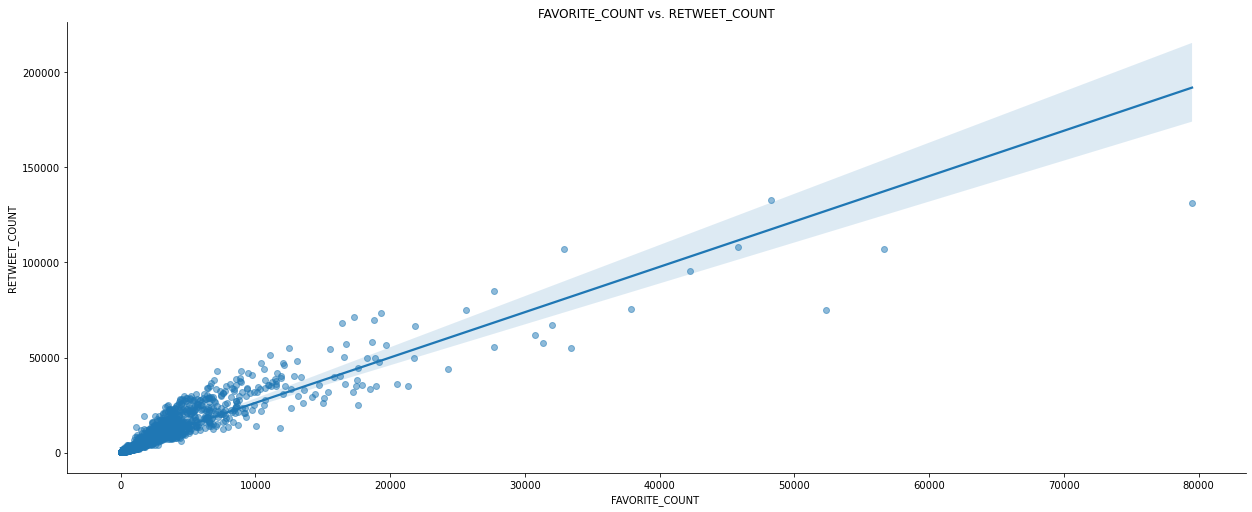

In [110]:
sns.lmplot(x="RETWEET_COUNT", 
           y="FAVORITE_COUNT", 
           data= master_clean_archive,
           size = 7,
           aspect=2.5,
           scatter_kws={'alpha':1/2});
plt.title('FAVORITE_COUNT vs. RETWEET_COUNT');
plt.xlabel('FAVORITE_COUNT ');
plt.ylabel('RETWEET_COUNT');

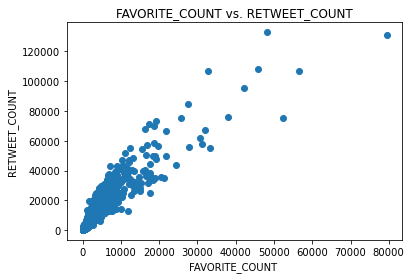

In [111]:
plt.scatter(x="RETWEET_COUNT", 
           y="FAVORITE_COUNT", 
           data= master_clean_archive)
plt.title('FAVORITE_COUNT vs. RETWEET_COUNT');
plt.xlabel('FAVORITE_COUNT ');
plt.ylabel('RETWEET_COUNT');

#### The Distribution of Tweet image number

C:\Users\pgsib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


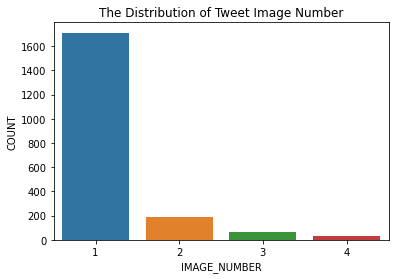

In [112]:
sns.countplot(master_clean_archive.IMAGE_NUMBER)
plt.xlabel('IMAGE_NUMBER'),
plt.ylabel('COUNT'),
plt.title('The Distribution of Tweet Image Number');

#### MOST POPULAR DOG BREED

In [113]:
dog_breed = master_clean_archive.PREDICTED_BREED.value_counts()[1:15]

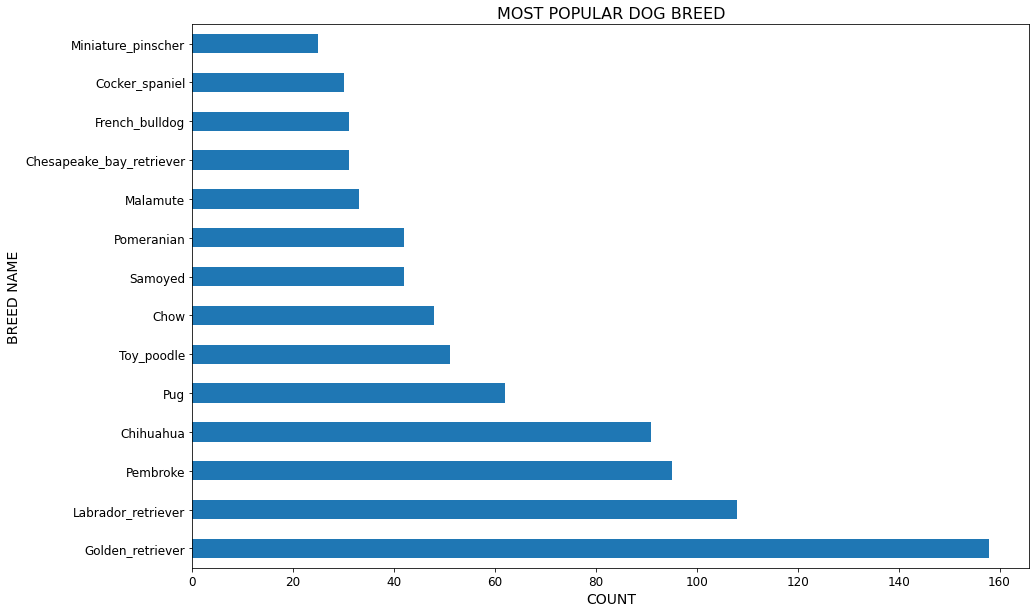

In [114]:
dog_breed.plot(kind = 'barh',figsize = (15,10), fontsize = '12' )
plt.title('MOST POPULAR DOG BREED', fontsize = '16')
plt.xlabel('COUNT', fontsize = '14')
plt.ylabel('BREED NAME', fontsize = '14');

#### The Distribution of Dog Stages

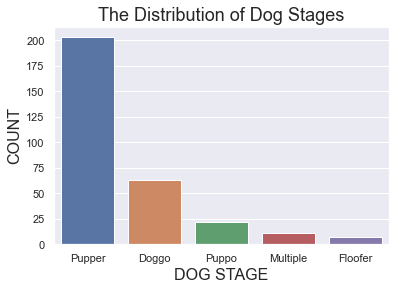

In [115]:
sns.set(style = 'darkgrid')
sorted_age = master_clean_archive['DOG_STAGE'].value_counts().head().index
sns.countplot(data = master_clean_archive, x ='DOG_STAGE', order = sorted_age, orient='h')
plt.xlabel('DOG STAGE', fontsize=16)
plt.ylabel('COUNT', fontsize=16)
plt.title('The Distribution of Dog Stages', fontsize=18);

##### MOST POPULAR DOG NAME

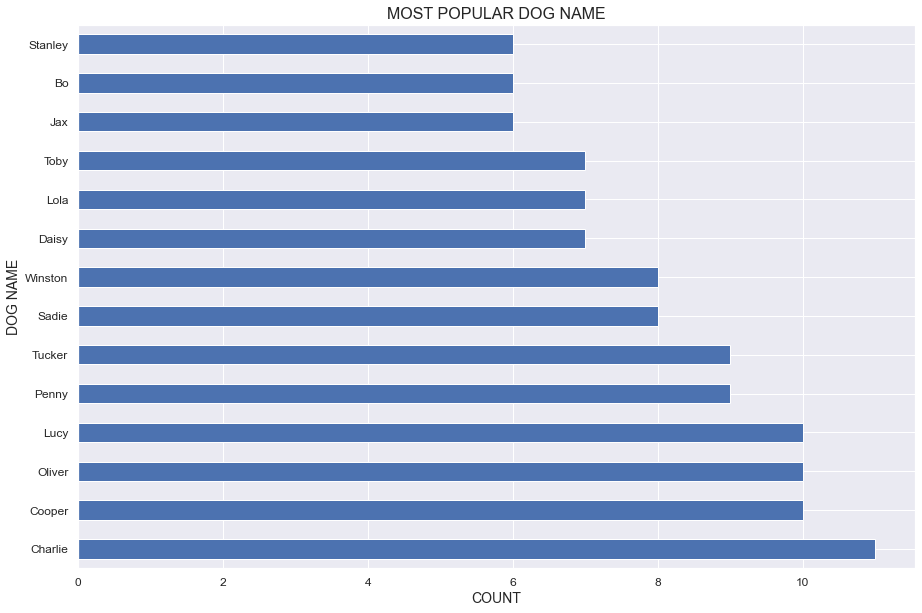

In [116]:
master_clean_archive.NAME.value_counts()[1:15].plot(kind = 'barh',figsize = (15,10), fontsize = '12' )
plt.title('MOST POPULAR DOG NAME', fontsize = '16')
plt.xlabel('COUNT', fontsize = '14')
plt.ylabel('DOG NAME', fontsize = '14');

#### RETWEETS COUNT FROM 2015 TO 2017

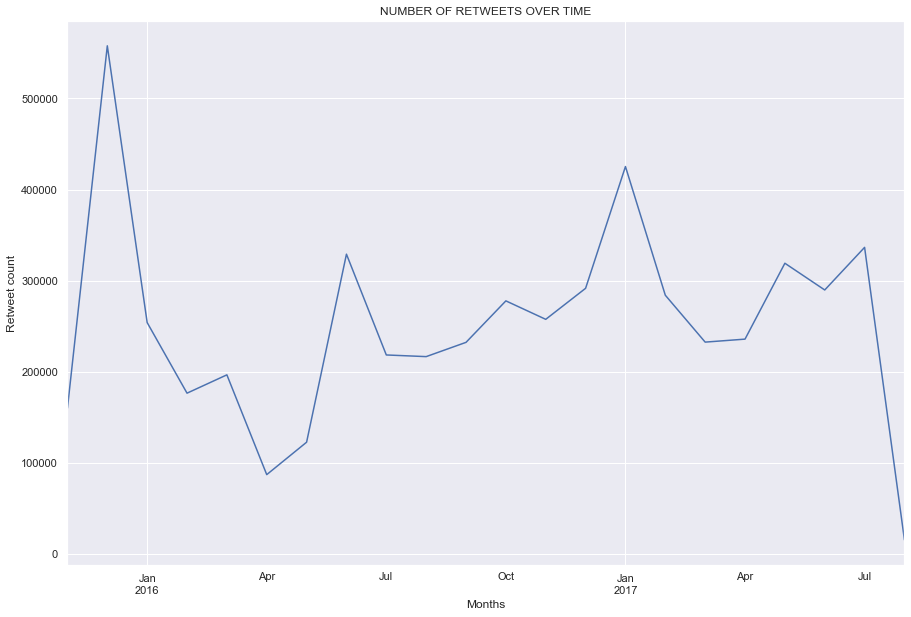

In [117]:
master_clean_archive.groupby(pd.Grouper(key = 'TIMESTAMP', freq = "M")).sum()['RETWEET_COUNT'].plot(figsize=(15, 10));
plt.ylabel('Retweet count')
plt.xlabel('Months')
plt.title('NUMBER OF RETWEETS OVER TIME');

#### NUMBER OF TWEETS OVER TIME

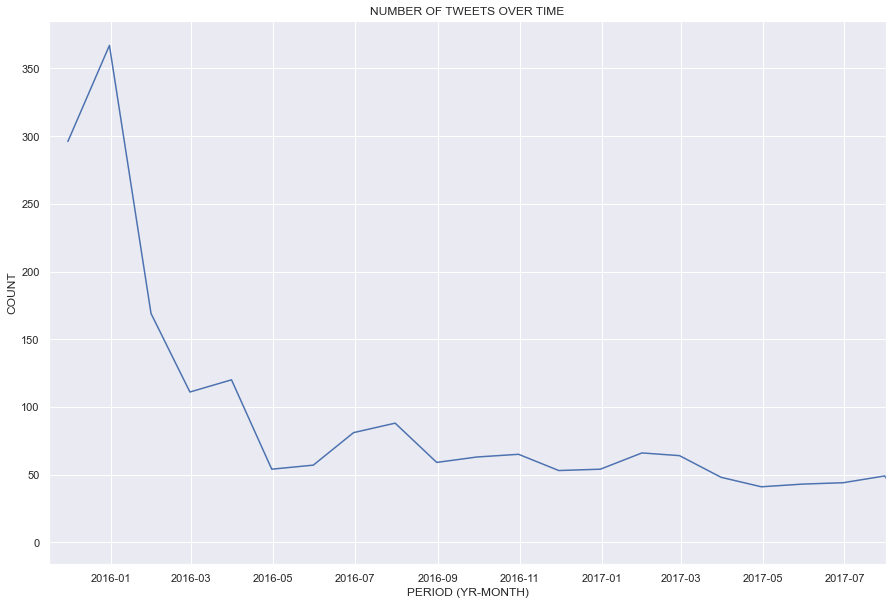

In [118]:
monthly_tweets = master_clean_archive.groupby(pd.Grouper(key = 'TIMESTAMP', freq = "M")).count().reset_index()[['TIMESTAMP', 'TWEET_ID']]

plt.figure(figsize=(15, 10));
plt.xlim([datetime.date(2015, 11, 16), datetime.date(2017, 8, 1)]);

plt.xlabel('PERIOD (YR-MONTH)')
plt.ylabel('COUNT')

plt.plot(monthly_tweets.TIMESTAMP, monthly_tweets.TWEET_ID);
plt.title('NUMBER OF TWEETS OVER TIME');

#### NUMBER OF RETWEETS OVER TIME

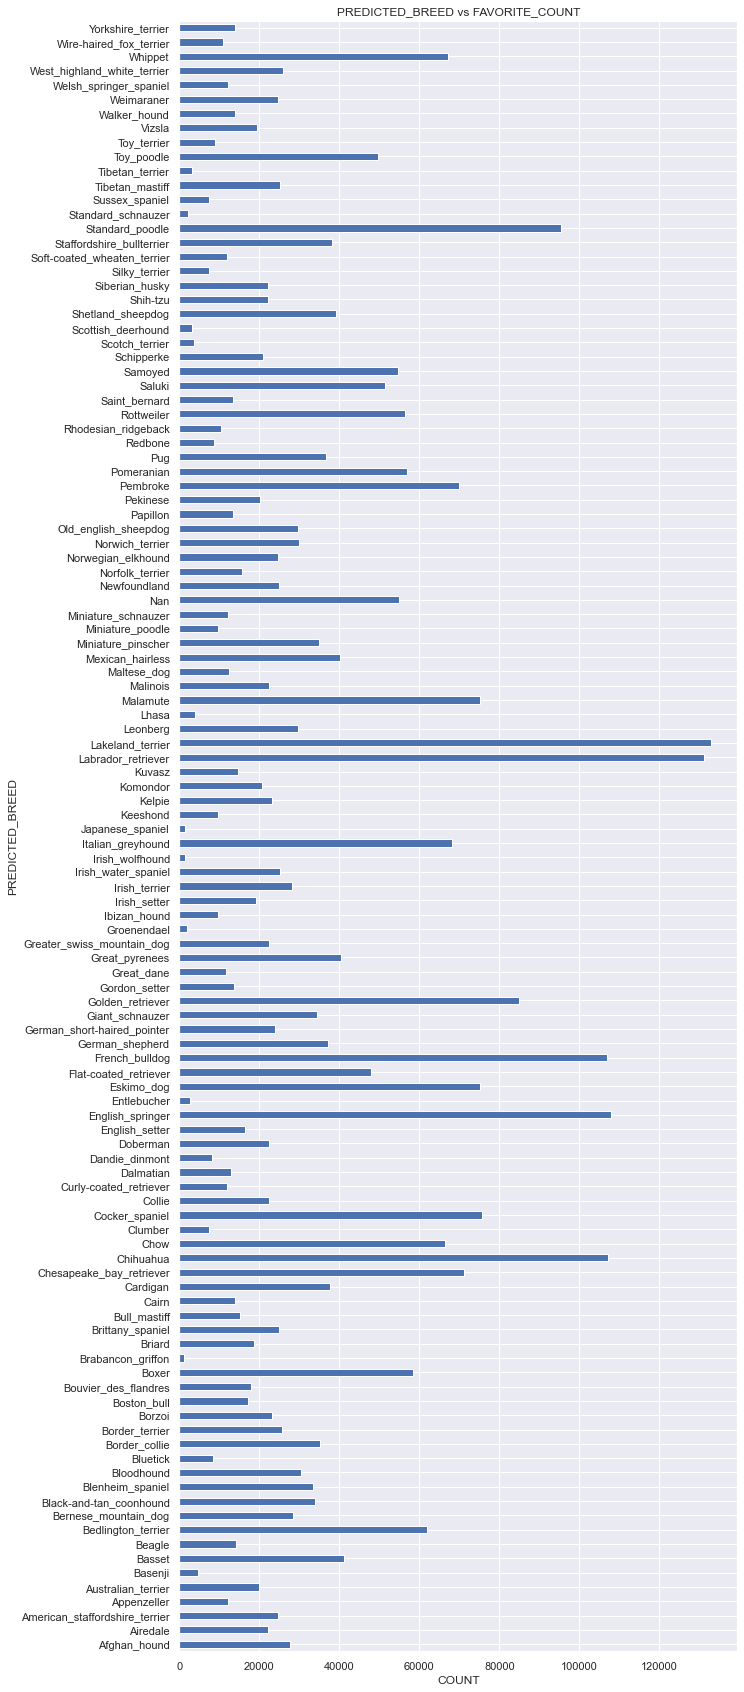

In [119]:
#favorite count for each predicted dog breed
master_clean_archive.groupby(['PREDICTED_BREED'])['FAVORITE_COUNT'].max().plot(kind='barh',figsize=(10,30))
plt.xlabel('COUNT')
plt.ylabel('PREDICTED_BREED')
plt.title('PREDICTED_BREED vs FAVORITE_COUNT');

Lakeland terrier has the highest favorite counts followed by Labrador retriever